# Introdução à Evolução
## Seleção natural
Seleção natural é o fenômeno relacionado com a diferença na capacidade de diferentes indivíduos de formar descendentes, ou seja, crescer. Esta diferença decorre do efeito do ambiente sobre os indivíduos, cada qual com seu grau de adaptação. Esta capacidade de reprodução também representada pela taxa de reprodução, em modelos evolutivos, Corresponde ao grau de adaptação do indívíduo ao seu ambiente e é chamada de **Fitness**.

Para modelar os efeitos da seleção natural, precisamos de pelo menos dois "tipos" de indivíduos. Vamos chamá-los de A e B. Denotaremos o fitness de A por $a$ e o de B por $b$. Seja $x(t)$ o número de indivúduos do tipo A no tempo $t$ e $y(t)$ o número de indivíduos do tipo B no tempo $t$. Sejam ainda $x_0$ e $y_0$ os números de A e B no tempo $t=0$.

Cujas soluções são:

In [9]:
%display typeset

In [2]:
var("x x_0 y_0 a b y t")
x  = function('x')(t)
y  = function('y')(t)
xdot = diff(x,t)==a*x
ydot = diff(y,t)==b*y
show(xdot)
show(ydot)
solx = desolve(xdot,x, ics=[x_0], ivar=t)
soly = desolve(ydot,y, ics=[y_0], ivar=t)
show(solx.subs(_C=x_0))
show(soly.subs(_C=y_0))
xdot/ydot

diff(x(t), t) == a*x(t)

diff(y(t), t) == b*y(t)

x_0*e^(a*t)

y_0*e^(b*t)

diff(x(t), t)/diff(y(t), t) == a*x(t)/(b*y(t))

Seja $t=τ$ o tempo até que a população A dobre de tamanho, é fácil encontrar que $τ=log_2 /a$. De maneira similar, B leva $log_2 /b$ para dobrar de tamanho.

In [3]:
var('tau')
f = x_0*exp(a*tau)==2*x_0
solve(f,tau)

[tau == log(2)/a]

Seja a razão entre as duas populações: $ρ(t)=x(t)/y(t)$. Logo temos a seguinte equação diferencial

$$\dot{ρ}=\frac{\dot{x}y−x\dot{y}}{y^2}=(a−b)ρ,$$
onde $\dot{\rho}=\frac{d\rho}{dt}$. Abaixo temos a derivação de $\dot{ρ}$ usando o sage:

In [4]:
var('rho x y t')
x = function('x')(t)
y = function('y')(t)
rho = function('rho')(t) == x/y
drho = diff(rho,t)
drho.simplify_full()

diff(rho(t), t) == (y(t)*diff(x(t), t) - x(t)*diff(y(t), t))/y(t)^2

cuja solução é $ρ(t)=ρ_0e^{(a−b)t}$. Se $a>b,$ $ρ$ tende a infinito, em cujo caso A vencerá a competição com B, e se $a<b$, $ρ$ tenderá a zero, dando a vantagem a B.

Agora imaginemos o caso em a população total é constante, por exemplo em decorrência da existência de uma capacidade de suporte ambiental. Neste caso, para simplificar vamos considera que tanto $x(t)$ quanto $y(t)$ representam a abundância relativa de seus tipos respectivos, ou como também poderíamos chamar, a sua frequência, logo $x+y=1$. Temos então o seguinte sistema de equações:
\begin{align}
\dot{x}&=(a−ϕ)x\\
\dot{y}&=(b−ϕ)y
\end{align}
Sendo $ϕ$ o fitness médio da população, $ϕ=ax+by$, o crescimento/decrescimento de cada população, passa a ser relativo ao fitness médio, conforme as equações acima. 

Podemos simplicar o sistema acima, substituindo $y$ por $1−x$:

$$\dot{x}=x(1−x)(a−b)$$
A equação acima apresenta dois equilíbrios: $x=0$ e $x=1$. No primeiro, todos os indivíduos são do tipo B e no segundo todos os indivíduos são do tipo A. Após o sistema atingir qualquer dos equilíbrios, nada mais pode ocorrer pois já não haverão indivíduos do outro tipo. Qual dos equilíbrios irá absorver a dinâmica do sistema depende  dos valores $a$ e $b$. Se $a<b$ o sistema convergirá para o equilíbrio $x=0$, e no caso contrário, para $x=1$. É a "sobrevivência do mais apto".

In [5]:
var("a b x y")
c=(a-(a*x+b*y))*x
s=x*(1-x)*(a-b)
show(c.subs(y=1-x))


(b*(x - 1) - a*x + a)*x

## Sobrevivência do mais Apto
Este modelo pode ser extendido para descrever a seleção entre $n$ tipos diferentes: Seja $x_i(t)$ a frequência do tipo $i$, $(i=1…n)$. Seja $f_i$ o fitness  do tipo $i$. Assim o fitness médio da população é dado por 

$$ϕ=\sum_{i=1}^n x_if_i$$
A dinâmica da seleção continua como antes:

$$\dot{x}_i=x_i(f_i−ϕ)$$
Da mesma forma a frequencia de um dado tipo aumenta apenas se a sua fitness (aptidão) for maior que a da média da população, caso contrário diminuirá. A população total continua constante: $\sum_{i=1}^n x_i=1$ e $\sum^n_{i=1} \dot{x}_i=0$.

#### Exercício:
Implementar uma simulação de competição com 10 tipos para visualizar o efeito das extinções sobre o fitness médio da população e a dinâmica dos outros tipos

In [1]:
import numpy as np
n = 10
fis = np.array([random() for i in range(n)])
def evolucao(t,y):
    phi = sum(np.array(y)*fis)
    d = y*(fis-phi)
    return d

In [2]:
T = ode_solver()
T.algorithm = "rk8pd"
T.function = evolucao
T.ode_solve(y_0=[1/n]*n,t_span=[0,50], num_points=500)

In [5]:
from itertools import cycle
c = cycle(['red','blue','green', 'black', 'yellow', 'orange', 'magenta', 'gray', 'pink', 'brown'])
def plot_sol(sol):
    #fitness medio
    plots = list_plot([(j[0],sum(fis*np.array(j[1]))) for j in sol], plotjoined=True, linestyle='-.', legend_label=r"$\phi$")
    for i in range(len(sol[0][1])):
        co = c.__next__()
        plots += list_plot([(j[0],j[1][i]) for j in sol],color=co, plotjoined=True, legend_label='$x_{%s}$'%i, alpha=.8, gridlines=true)
    show(plots)

In [6]:
show(np.array(T.solution[0][1]))
show(fis)
sum(fis*np.array(T.solution[0][1]))

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

array([0.37866872, 0.38833532, 0.9706326 , 0.20868766, 0.11180252,
       0.02987381, 0.10963144, 0.07522007, 0.06235027, 0.95816281])

0.3293365226404851

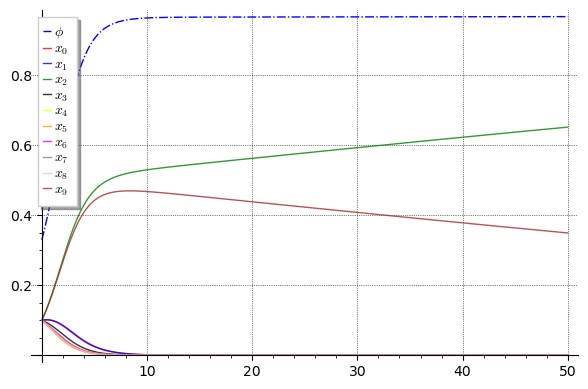

In [7]:
plot_sol(T.solution)

## O Simplex
o conjunto de pontos com a propriedade $\sum_{i=1}^n x_i=1$ é chamado simplex $S_n$. Em modelos Evolutivos como os que estamos estudando, as população evoluem no simplex.  O Simplex $S_n$ é uma estrutura $(n−1)$-dimensional embutida em um espaço Euclidiano $n$-dimensional. Então para dois tipos, temos um segmento de reta, $S_2$, para três , um triângulo, $S_3$  para 4 um tetraedro, $S_4$ e  assim por diante. o simplex $S_n$ tem $n$ faces e cada uma delas é um simplex $S_{n−1}$. Os vértices de um simplex no contexto de nosso modelo evolutivo, são os pontos onde a penas um tipo está presente, e os demais foram extintos. Os pontos do simplex, que não pertencem a nenhuma das faces ou são vértices, são pontos internos, que representam estados onde há co-existência entre todos os $n$ tipos.

### Relaxando a premissa de taxas de crescimento lineares
No modelo de dois tipos apresentado acima, assumimos que a taxas de crescimento eram funções lineares da frequência dos tipos. Podemos relaxar esta premissa re-escrevendo as equações da seguinte forma:
\begin{align}
\dot{x}&=ax^c−ϕx\\
\dot{y}&=by^c−ϕy
\end{align}

Neste novo modelo se $c=1$ temos nosso modelo antigo, mas se $c<1$ temos um crescimento sub-exponencial, ou seja na ausência da limitação por densidade, $ϕ$,  a curva de crescimento seria mais lenta do que uma exponencial. Quando $c>1$, o crescimento torna-se super-exponencial e a curva de crescimento hiperbólica.



In [11]:
var('x y a  b c phi t')
x = function('x')(t)
f = diff(x,t) == a*x^c -phi*x
pretty_print(html('$c>1$'))
show(desolve(f(c=2),x, ics=[0], ivar=t, contrib_ode=True))
pretty_print(html('$c<1$'))
show(desolve(f(c=0.9),x, ics=[0], ivar=t, contrib_ode=True))
pretty_print(html('$c=1$'))
show(desolve(f(c=1),x, ics=[0], ivar=t, contrib_ode=True))

<script type="math/tex">c>1</script>

(log(a*x(t) - phi) - log(x(t)))/phi == _C + t

<script type="math/tex">c<1</script>

-10*log(phi*x(t)^(1/10) - a)/phi == _C + t

<script type="math/tex">c=1</script>

_C*e^((a - phi)*t)

Para manter a população constante agora, $x+y=1$,  fazemos $ϕ=ax^c+by^c$. Então, de forma similar a como fizemos anteriormente, podemos simplificar o sistema acima a

$$\dot{x}=x(1−x)f(x)$$
onde

$$f(x)=ax^{c−1}−b(1−x)^{c−1}$$


In [12]:
a=.5
b=.6

@interact
def variando_c(c=(0.2,1.8,.2)):
    phi(x) = a*x^(c-1)-b*(1-x)^(c-1)
    P = plot((x*(1-x)*phi).subs(a=.5, b=.6, c=c),(x,0,1))
    show(P)

Interactive function <function variando_c at 0x7f93b4290af0> with 1 widget
  c: FloatSlider(value=1.0, descrip…

#### Exercício 1:
Encontrar o equilíbrio interno ao simplex acima, $x^∗$, como uma expresão dos parâmetros do modelo, decrevendo a sua estabilidade, quando  $c>1$ e quando $c<1$.

In [13]:
s = solve(x*(1-x)*phi,x)
s

[x == 0, x == 1]

Então para $c≠1$, existe apenas um outro ponto fixo entre 0 e 1:

$$x^∗=\frac{1}{1+\sqrt[c-1]{a/b}}$$

### Invasibilidade
Invasão significa que uma quantidade infinitesimal de um dos tipos consegue crescer em uma população quase que completamente constituída pelo outro tipo.

#### Exercício 2:
Simule a dinâmica de um modelo com dois tipos e mostre o efeito do valor de c sobre a invasibilidade de um dos tipos.

#### Exercício 3:
Construa o diagrama de bifurcação do sistema $\dot{x}=x(1−x)f(x)$, onde $f(x)=ax^{c−1}−b(1−x)^{c−1}$. Encontre o ponto de bifurcação e identifique o tipo de bifurcação.

## Mutação
O processo natural de mutação, é a principal fonte de geração de variabilidade, que é a matéria prima sobre a qual a seleção natural atua. Mutações são erros que ocorrem durante a replicação do material genético de um indivíduo durante a reprodução. 

Vamos explorar a forma mais simples de inserir o conceito de mutação no modelo evolutivo que estamos desenvolvendo. Chamemos de $u_1$ a taxa de mutação de A para B, ou seja, $u_1$ é a probabilidade de que a reprodução de um indivíduo do tipo A gere um indivíduo do tipo B.  De maneira similar, vamos chamar de $u_2$ a taxa de mutação de B para A. Isto nos leva às seguintes equações:
\begin{align}
\dot{x}&=x(1−u_1)+yu_2−ϕx\\
\dot{y}&=xu_1+y(1−u_2)−ϕy
\end{align}
Se assumirmos que A e B têm o mesmo fitness, ou seja, ($a=b=1$), o fitness médio da população, é constante e dado por $ϕ=ax+by=1$, dado que $x+y=1$. Com isso, o sistema acima se reduz à seguinte equação diferencial:

$$\dot{x}=u_2−x(u_1+u_2).$$
Que apresenta o seguinte equilíbrio para a frequência do tipo A:



In [10]:
var('x u_1 u_2')
solve(u_2-x*(u_1+u_2),x)

[x == u_2/(u_1 + u_2)]

Concluímos que neste caso de igual fitness a mutação leva à co-existência dos tipos, e as suas frequências no equilíbrio dependerá das taxas de mutação.

#### Exercício 4:
Encontre a razão entre as frequências de A e B no equilíbrio.

### Matriz de Mutação
Podemos extender a dinâmica de mutação para $n$ tipos. Para isso precisamos introduzir a matriz de mutação, $Q=[q_{ij}]$. A probabilidade e do tipo $i$ mutar para o tipo $j$ é dada por $q_{ij}$. Como cada tipo gera, na reprodução, um outro indivíduo do seu tipo ou de outro tipo, temos que $\sum^n_{j=1}q_{ij}=1$. Logo $Q$ é uma matriz estocástica $n\times n$.

Matrizes estocásticas têm as seguintes propriedades:

1. Todos os elementos são números no intervalo [0,1] (probabilidades)
1. São quadradas
1. A soma de cada linha é 1

Matrizes estocásticas têm sempre um autovalor igual a 1 , e nenhum autovalor pode ter um valor absoluto maior do que 1.

O dinâmica de mutação fica então:

$$\dot{x}_i=\sum_{j=1}^n x_jq_{ji}−ϕx_i$$
para $i=1,\ldots,n.$ 

Ou, em notação vetorial:

$$\dot{\overrightarrow{x}}=\overrightarrow{x} Q−\phi\overrightarrow{x}$$
Novamente o fitness médio é $ϕ=1$. O equilíbrio é dado pelo autovetor à esquerda, associado com o autovalor 1:

$$\overrightarrow{x^∗}Q=\overrightarrow{x^∗}$$

#### Exercício 5:
Simule um modelo de seleção com mutação, com matrizes de mutação simétricas e assimétricas.